In [162]:
 import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import MinMaxScaler

# Models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
import nltk
import string
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
#Result Representation
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import sklearn.model_selection
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
scaler = MinMaxScaler()
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from scipy.interpolate import interp1d

In [163]:
df=pd.read_csv("/content/data.csv")


In [164]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [165]:
to_drop={"street","city","statezip","country","date"}

In [166]:
df.drop(to_drop,axis=1,inplace=True)


In [167]:
df_scapegoat = df.copy()
df_scapegoat.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


In [168]:
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

<ipython-input-169-e4e63d541e97>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='sqft_living_binned', data=df_scapegoat, palette="Set1")


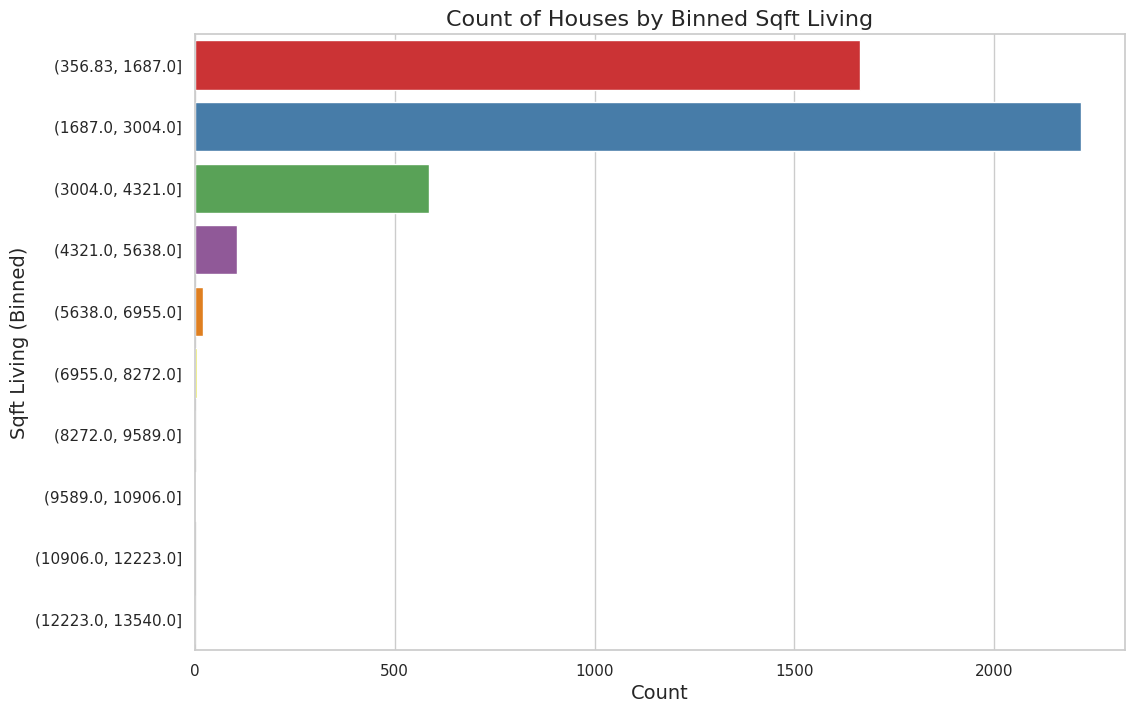

In [169]:
num_bins = 10

df_scapegoat['sqft_living_binned'] = pd.cut(df_scapegoat['sqft_living'], bins=num_bins)

plt.figure(figsize=(12, 8))

sns.set(style="whitegrid", palette="Set1")


sns.countplot(y='sqft_living_binned', data=df_scapegoat, palette="Set1")


plt.title('Count of Houses by Binned Sqft Living', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Sqft Living (Binned)', fontsize=14)

plt.show()

<ipython-input-170-bce8cfe3f16b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='sqft_lot_bined', data=df_scapegoat, palette="Set1")


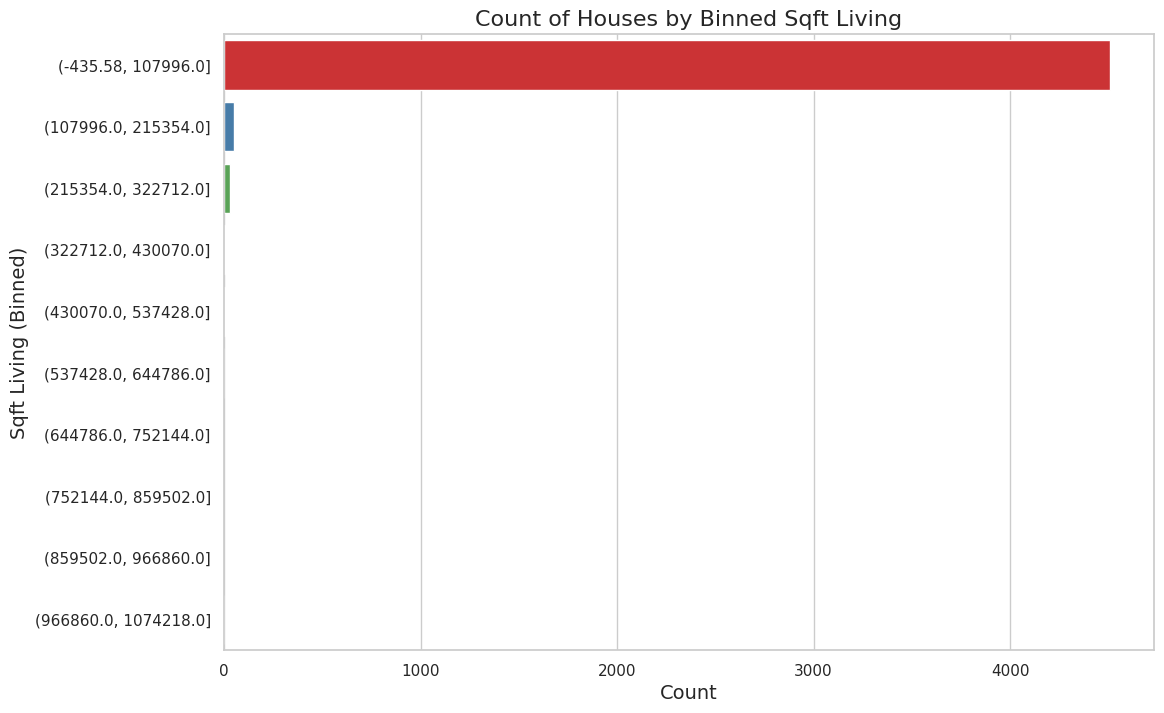

In [170]:
num_bins = 10

df_scapegoat['sqft_lot_bined'] = pd.cut(df_scapegoat['sqft_lot'], bins=num_bins)

plt.figure(figsize=(12, 8))

sns.set(style="whitegrid", palette="Set1")


sns.countplot(y='sqft_lot_bined', data=df_scapegoat, palette="Set1")


plt.title('Count of Houses by Binned Sqft Living', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Sqft Living (Binned)', fontsize=14)

plt.show()

<ipython-input-171-8ccb47a29c78>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='sqft_above_bined', data=df_scapegoat, palette="Set1")


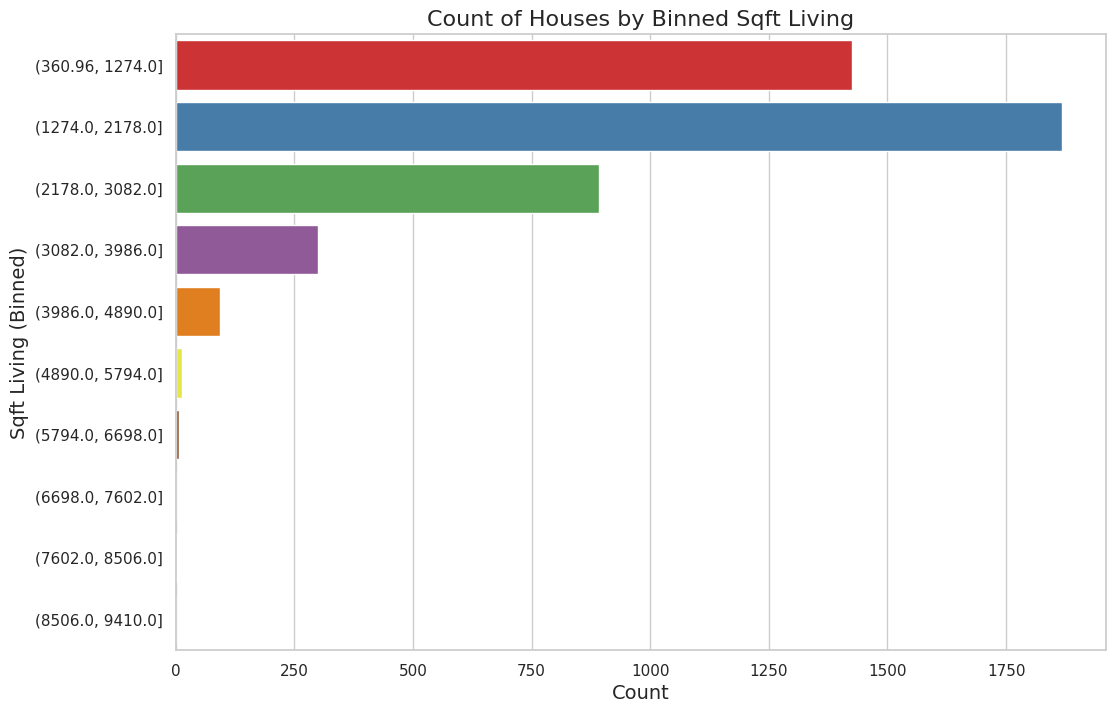

In [171]:
num_bins = 10

df_scapegoat['sqft_above_bined'] = pd.cut(df_scapegoat['sqft_above'], bins=num_bins)

plt.figure(figsize=(12, 8))

sns.set(style="whitegrid", palette="Set1")


sns.countplot(y='sqft_above_bined', data=df_scapegoat, palette="Set1")


plt.title('Count of Houses by Binned Sqft Living', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Sqft Living (Binned)', fontsize=14)

plt.show()

<ipython-input-172-828a2df23c79>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='sqft_basement_bined', data=df_scapegoat, palette="Set1")


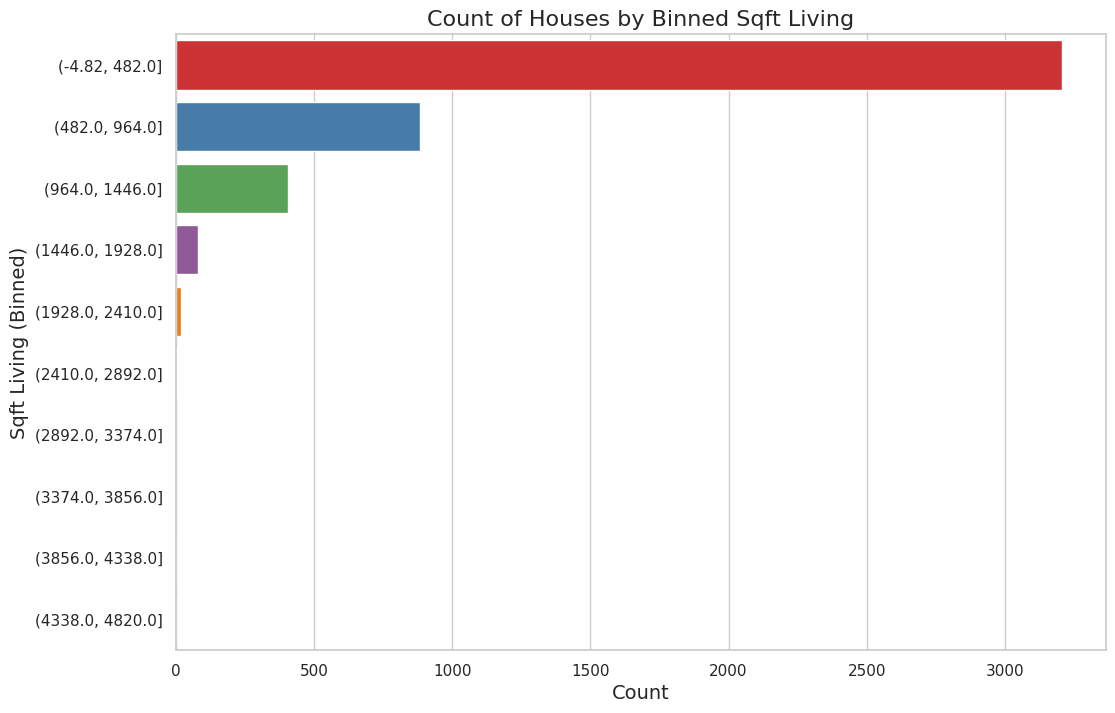

In [172]:
num_bins = 10

df_scapegoat['sqft_basement_bined'] = pd.cut(df_scapegoat['sqft_basement'], bins=num_bins)

plt.figure(figsize=(12, 8))

sns.set(style="whitegrid", palette="Set1")


sns.countplot(y='sqft_basement_bined', data=df_scapegoat, palette="Set1")


plt.title('Count of Houses by Binned Sqft Living', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Sqft Living (Binned)', fontsize=14)

plt.show()

##sqft_basement	yr_built	yr_renovated

<ipython-input-173-b14e69d7678d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='yr_built_bined', data=df_scapegoat, palette="Set1")


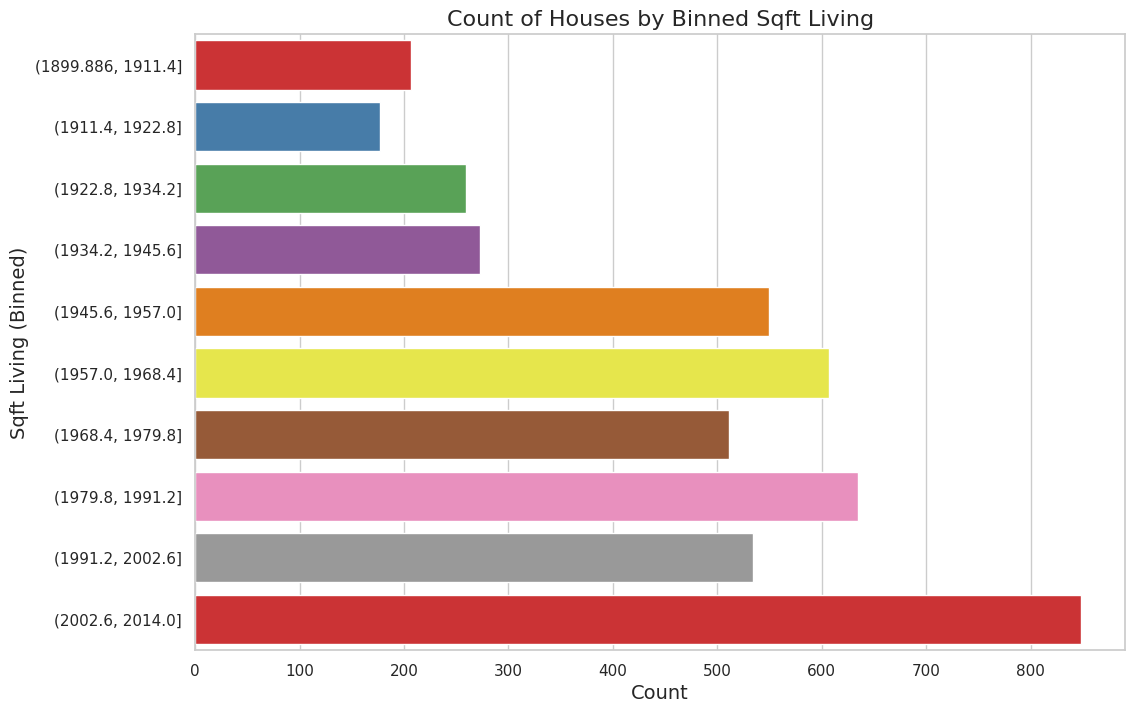

In [173]:
num_bins = 10

df_scapegoat['yr_built_bined'] = pd.cut(df_scapegoat['yr_built'], bins=num_bins)

plt.figure(figsize=(12, 8))

sns.set(style="whitegrid", palette="Set1")


sns.countplot(y='yr_built_bined', data=df_scapegoat, palette="Set1")


plt.title('Count of Houses by Binned Sqft Living', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Sqft Living (Binned)', fontsize=14)

plt.show()

This one looks neat

<ipython-input-174-9f9066a47965>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='yr_renovated_bined', data=df_scapegoat, palette="Set1")


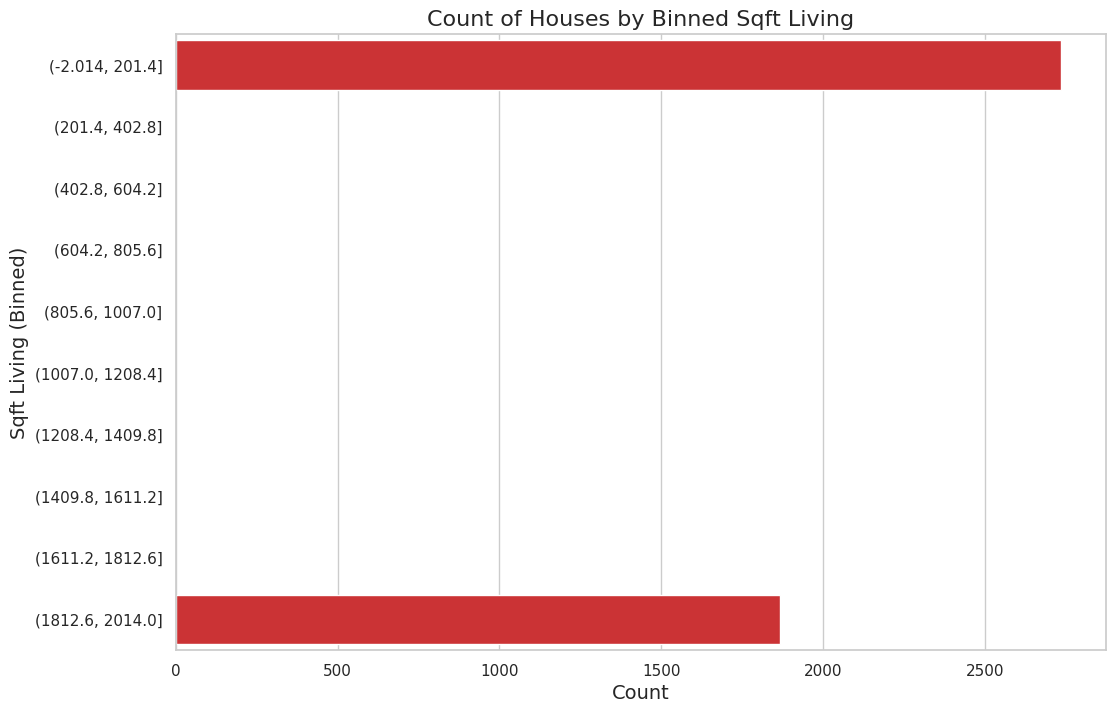

In [174]:
num_bins = 10

df_scapegoat['yr_renovated_bined'] = pd.cut(df_scapegoat['yr_renovated'], bins=num_bins)

plt.figure(figsize=(12, 8))

sns.set(style="whitegrid", palette="Set1")


sns.countplot(y='yr_renovated_bined', data=df_scapegoat, palette="Set1")


plt.title('Count of Houses by Binned Sqft Living', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Sqft Living (Binned)', fontsize=14)

plt.show()

We can see how the plot distribution is kinda uneven



So lets try and split data and normalize vs just normalizing

So we gonna first use the simply scaled one and get the accuracy then use the one we normalized after splitting


In [175]:
df_scaled.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,0.011771,0.333333,0.18750,0.073652,0.006775,0.2,0.0,0.0,0.50,0.107301,0.000000,0.482456,0.995531
1,0.089658,0.555556,0.31250,0.249051,0.007835,0.4,0.0,1.0,1.00,0.331858,0.058091,0.184211,0.000000
2,0.012862,0.333333,0.25000,0.118451,0.010534,0.0,0.0,0.0,0.75,0.172566,0.000000,0.578947,0.000000
3,0.015795,0.333333,0.28125,0.123766,0.006885,0.0,0.0,0.0,0.75,0.069690,0.207469,0.552632,0.000000
4,0.020684,0.444444,0.31250,0.119210,0.009186,0.0,0.0,0.0,0.75,0.085177,0.165975,0.666667,0.989076


In [176]:
X = df_scaled.drop('price', axis = 1)
y = df_scaled['price']#one with ane another withouht charges

In [177]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 123)

In [178]:
model = LinearRegression()

In [179]:
model.fit(X_train, y_train)

LinearRegression()

In [180]:
y_pred = model.predict(X_test)

In [181]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.00011073517156157402
R^2 Score: 0.5618575573393517


R^2 value of 0.561 suggest it isnt performing very well



In [182]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


**Trying to split and normalizing sqft_living**

In [183]:
df_updated=df.copy()

In [184]:
average_value = df['sqft_living'].mean()

In [185]:
threshold = 1800

df_updated['sqft_above_below_threshold'] = df['sqft_living'].apply(lambda x: x if x <= threshold else average_value)
df_updated['sqft_above_above_threshold'] = df['sqft_living'].apply(lambda x: x if x > threshold else average_value)




In [186]:
df_updated.fillna(average_value, inplace=True)

In [187]:
df_updated = pd.DataFrame(scaler.fit_transform(df_updated), columns=df_updated.columns)

In [188]:
df_updated.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_above_below_threshold,sqft_above_above_threshold
0,0.011771,0.333333,0.18750,0.073652,0.006775,0.2,0.0,0.0,0.50,0.107301,0.000000,0.482456,0.995531,0.548225,0.028077
1,0.089658,0.555556,0.31250,0.249051,0.007835,0.4,0.0,1.0,1.00,0.331858,0.058091,0.184211,0.000000,1.000000,0.156863
2,0.012862,0.333333,0.25000,0.118451,0.010534,0.0,0.0,0.0,0.75,0.172566,0.000000,0.578947,0.000000,1.000000,0.010230
3,0.015795,0.333333,0.28125,0.123766,0.006885,0.0,0.0,0.0,0.75,0.069690,0.207469,0.552632,0.000000,1.000000,0.016198
4,0.020684,0.444444,0.31250,0.119210,0.009186,0.0,0.0,0.0,0.75,0.085177,0.165975,0.666667,0.989076,1.000000,0.011083


In [189]:
X = df_updated.drop('price', axis = 1)
y = df_updated['price']#one with ane another withouht charges

In [190]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 123)

In [191]:
model.fit(X_train, y_train)

LinearRegression()

In [192]:
y_pred = model.predict(X_test)

In [193]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.00010824863399369958
R^2 Score: 0.5716959639484948


**Trying and splitting and then normalizing year_build**

In [194]:
df_updated1=df.copy()

In [195]:
average_value = df['yr_built'].mean()

In [196]:
threshold = 1974.1

# Apply the logic to create the new columns
df_updated1['sqft_above_below_threshold'] = df['sqft_living'].apply(lambda x: x if x <= threshold else 0)
df_updated1['sqft_above_above_threshold'] = df['sqft_living'].apply(lambda x: x if x > threshold else 0)



In [197]:
df_updated1.fillna(0, inplace=True)

In [198]:
df_updated1 = pd.DataFrame(scaler.fit_transform(df_updated1), columns=df_updated1.columns)

In [199]:
df_updated1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_above_below_threshold,sqft_above_above_threshold
0,0.011771,0.333333,0.18750,0.073652,0.006775,0.2,0.0,0.0,0.50,0.107301,0.000000,0.482456,0.995531,0.680203,0.000000
1,0.089658,0.555556,0.31250,0.249051,0.007835,0.4,0.0,1.0,1.00,0.331858,0.058091,0.184211,0.000000,0.000000,0.269572
2,0.012862,0.333333,0.25000,0.118451,0.010534,0.0,0.0,0.0,0.75,0.172566,0.000000,0.578947,0.000000,0.979695,0.000000
3,0.015795,0.333333,0.28125,0.123766,0.006885,0.0,0.0,0.0,0.75,0.069690,0.207469,0.552632,0.000000,0.000000,0.147710
4,0.020684,0.444444,0.31250,0.119210,0.009186,0.0,0.0,0.0,0.75,0.085177,0.165975,0.666667,0.989076,0.984772,0.000000


In [200]:
X = df_updated1.drop('price', axis = 1)
y = df_updated1['price']#one with ane another withouht charges

In [201]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 123)

In [202]:
model.fit(X_train, y_train)

LinearRegression()

In [203]:
y_pred = model.predict(X_test)

In [204]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.00011128042767436046
R^2 Score: 0.5597001592718456


In [205]:
def find_optimal_threshold(df, model, threshold_range, test_size=0.2, random_state=123):
    max_r2 = 0
    optimal_threshold = None

    for threshold in threshold_range:
        df_updated3 = df.copy()
        df_updated3['sqft_above_below_threshold'] = df['sqft_living'].apply(lambda x: x if x <= threshold else 0)
        df_updated3['sqft_above_above_threshold'] = df['sqft_living'].apply(lambda x: x if x > threshold else 0)
        df_updated3.drop(columns=['sqft_living'], inplace=True)
        df_updated3.fillna(0, inplace=True)

        scaler = StandardScaler()
        df_updated3 = pd.DataFrame(scaler.fit_transform(df_updated3), columns=df_updated3.columns)


        X = df_updated3.drop('price', axis=1)
        y = df_updated3['price']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        if r2 > max_r2:
            max_r2 = r2
            optimal_threshold = threshold

    return max_r2, optimal_threshold
    return max_r2, optimal_threshold

In [206]:
threshold_range = range(300, 5600, 100)

# Find the optimal threshold and maximum R² score
max_r2, optimal_threshold = find_optimal_threshold(df, model, threshold_range)

print(f"Maximum R² score: {max_r2}")
print(f"Optimal threshold: {optimal_threshold}")

Maximum R² score: 0.581834153436624
Optimal threshold: 5400


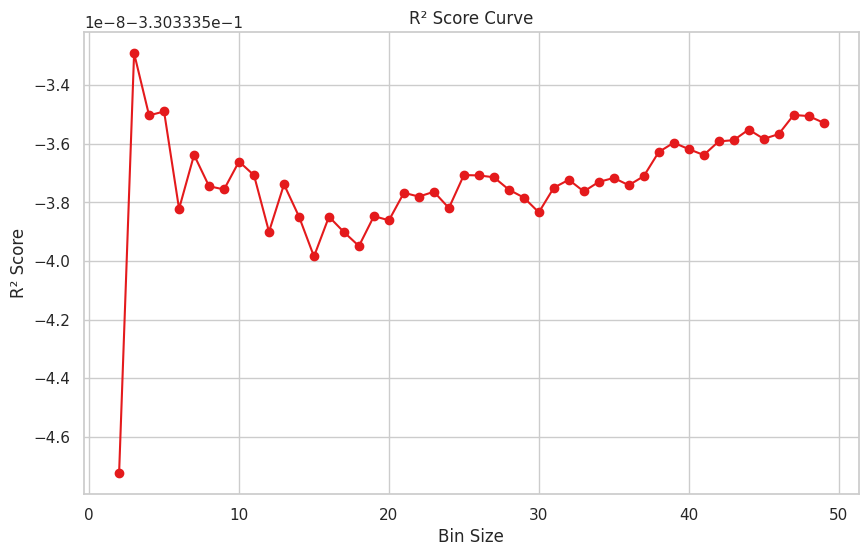

Optimal bin size: 3


In [207]:
bin_sizes = range(2, 50)

bin_size_values = []
r2_values = []

for bin_size in bin_sizes:
    X_train_updated = df.iloc[X_train.index]  # Get the updated training data
    X_val_updated = df.iloc[X_val.index]  # Get the updated validation data

    X_train_binned = pd.DataFrame({col: pd.cut(X_train_updated[col], bins=bin_size, labels=False) for col in X_train_updated.columns})
    X_val_binned = pd.DataFrame({col: pd.cut(X_val_updated[col], bins=bin_size, labels=False) for col in X_val_updated.columns})

    # Add the additional columns
    model.fit(X_train_binned, y_train)
    y_pred = model.predict(X_val_binned)
    r2 = r2_score(y_val, y_pred)

    bin_size_values.append(bin_size)
    r2_values.append(r2)

plt.figure(figsize=(10, 6))
plt.plot(bin_size_values, r2_values, marker='o')
plt.xlabel('Bin Size')
plt.ylabel('R² Score')
plt.title('R² Score Curve')
plt.show()

interp_func = interp1d(r2_values, bin_size_values, kind='cubic')
optimal_bin_size = int(interp_func(max(r2_values)))

print(f'Optimal bin size: {optimal_bin_size}')

In [208]:
class FeatureSplitNormalizer(BaseEstimator, TransformerMixin):
    def __init__(self, feature, threshold):
        self.feature = feature
        self.threshold = threshold
        self.scaler = MinMaxScaler()

    def fit(self, X, y=None):
        return self

    def transform(self, df):
        df_updated2 = df.copy()
        df_updated2[f'{self.feature}_below_threshold'] = df_updated2[self.feature].apply(lambda x: x if x <= self.threshold else 0)
        df_updated2[f'{self.feature}_above_threshold'] = df_updated2[self.feature].apply(lambda x: x if x > self.threshold else 0)
        df_updated2.drop(columns=[self.feature], inplace=True)
        df_updated2.fillna(0, inplace=True)
        df_updated2 = pd.DataFrame(self.scaler.fit_transform(df_updated2), columns=df_updated2.columns)
        return df_updated2

In [209]:
pipeline = Pipeline([
    ('split_and_normalize', FeatureSplitNormalizer(feature='sqft_living', threshold=None)),
    ('linear_regression', LinearRegression())
])

In [210]:
param_grid = {
    'split_and_normalize__threshold': range(1000, 3000, 100)
}

In [211]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 123)

In [212]:
grid_search = GridSearchCV(pipeline, param_grid, scoring='r2', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('split_and_normalize',
                                        FeatureSplitNormalizer(feature='sqft_living',
                                                               threshold=None)),
                                       ('linear_regression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'split_and_normalize__threshold': range(1000, 3000, 100)},
             scoring='r2')

In [213]:
best_threshold = grid_search.best_params_['split_and_normalize__threshold']
best_r2 = grid_search.best_score_

In [214]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_pred)

In [215]:
print(f"Best sqft_living threshold: {best_threshold}")
print(f"Best R^2 score (cross-validation): {best_r2:.3f}")
print(f"Test R^2 score: {test_r2:.3f}")

Best sqft_living threshold: 2600
Best R^2 score (cross-validation): 0.081
Test R^2 score: -5544938944126837206286336.000


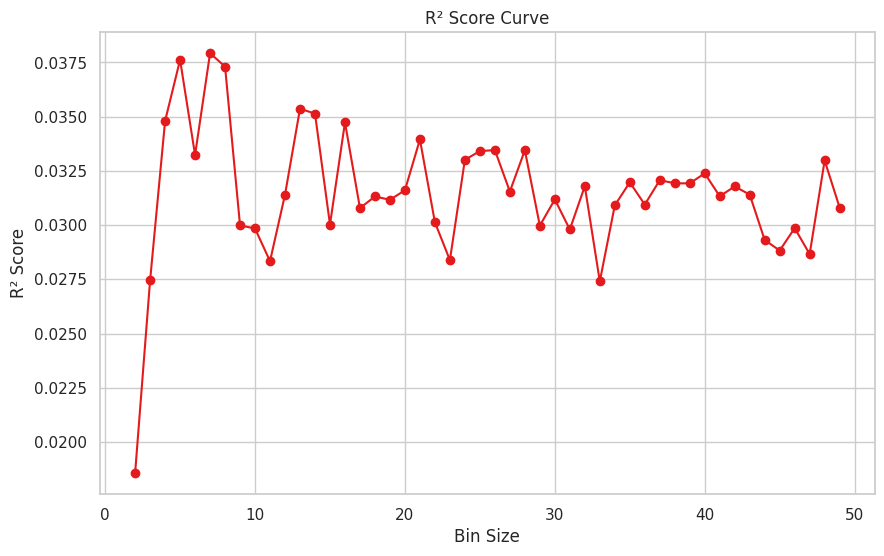

Optimal bin size: 7


In [216]:
bin_sizes = range(2, 50)

bin_size_values = []
r2_values = []

for bin_size in bin_sizes:

    X_train_binned = pd.concat([pd.cut(X_train[col], bins=bin_size, labels=False) for col in X_train.columns], axis=1)
    X_val_binned = pd.concat([pd.cut(X_val[col], bins=bin_size, labels=False) for col in X_val.columns], axis=1)


    model.fit(X_train_binned, y_train)

    y_pred = model.predict(X_val_binned)
    r2 = r2_score(y_val, y_pred)

    bin_size_values.append(bin_size)
    r2_values.append(r2)

plt.figure(figsize=(10, 6))
plt.plot(bin_size_values, r2_values, marker='o')
plt.xlabel('Bin Size')
plt.ylabel('R² Score')
plt.title('R² Score Curve')
plt.show()

interp_func = interp1d(r2_values, bin_size_values, kind='cubic')
optimal_bin_size = int(interp_func(max(r2_values)))

print(f'Optimal bin size: {optimal_bin_size}')

Minimizing mean squred error..

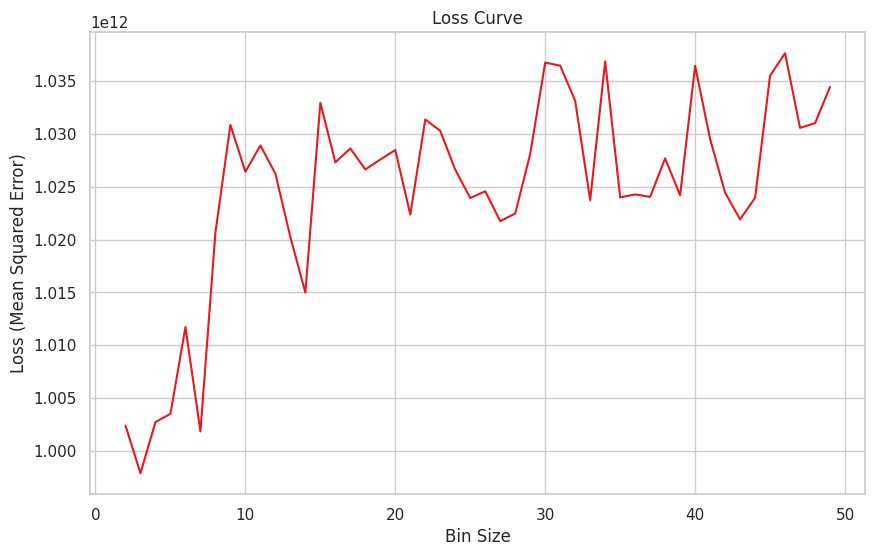

Optimal bin size: 3


In [217]:
df_new=df.copy()

X = df_new.drop('price', axis=1)
y = df_new['price']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

bin_sizes = range(2, 50)

bin_size_values = []
loss_values = []

for bin_size in bin_sizes:

    X_train_binned = pd.concat([pd.cut(X_train[col], bins=bin_size, labels=False, retbins=False) for col in X_train.columns], axis=1)
    X_val_binned = pd.concat([pd.cut(X_val[col], bins=bin_size, labels=False, retbins=False) for col in X_val.columns], axis=1)


    model.fit(X_train_binned, y_train)

    y_pred = model.predict(X_val_binned)
    loss = mean_squared_error(y_val, y_pred)


    bin_size_values.append(bin_size)
    loss_values.append(loss)


plt.figure(figsize=(10, 6))
plt.plot(bin_size_values, loss_values)
plt.xlabel('Bin Size')
plt.ylabel('Loss (Mean Squared Error)')
plt.title('Loss Curve')
plt.show()

# Interpolate the loss curve to find the optimal bin size
interp_func = interp1d(loss_values, bin_size_values, kind='cubic')
optimal_bin_size = int(interp_func(min(loss_values)))

print(f'Optimal bin size: {optimal_bin_size}')

Maximizeing R^2 (just trying)

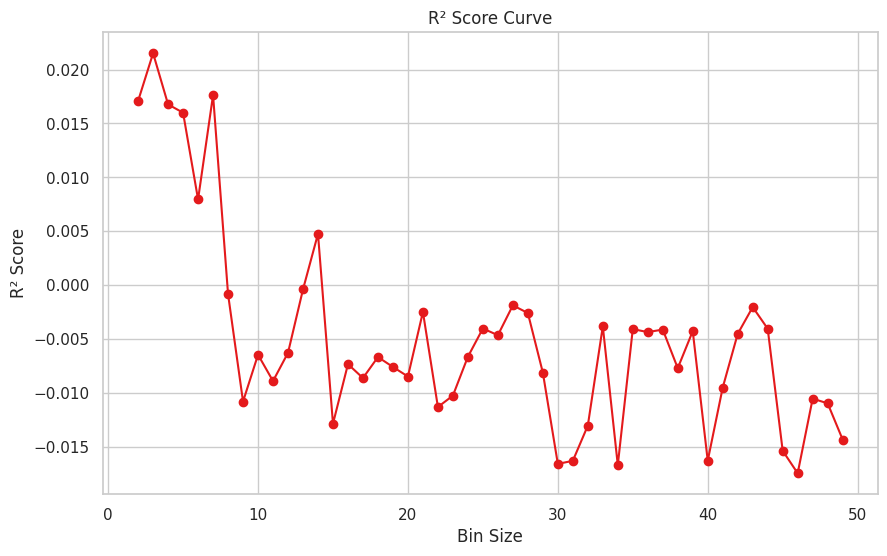

Optimal bin size: 3


In [218]:
df_new = df.copy()

X = df_new.drop('price', axis=1)
y = df_new['price']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

bin_sizes = range(2, 50)

bin_size_values = []
r2_values = []

for bin_size in bin_sizes:

    X_train_binned = pd.concat([pd.cut(X_train[col], bins=bin_size, labels=False) for col in X_train.columns], axis=1)
    X_val_binned = pd.concat([pd.cut(X_val[col], bins=bin_size, labels=False) for col in X_val.columns], axis=1)


    model.fit(X_train_binned, y_train)

    y_pred = model.predict(X_val_binned)
    r2 = r2_score(y_val, y_pred)

    bin_size_values.append(bin_size)
    r2_values.append(r2)

plt.figure(figsize=(10, 6))
plt.plot(bin_size_values, r2_values, marker='o')
plt.xlabel('Bin Size')
plt.ylabel('R² Score')
plt.title('R² Score Curve')
plt.show()

interp_func = interp1d(r2_values, bin_size_values, kind='cubic')
optimal_bin_size = int(interp_func(max(r2_values)))

print(f'Optimal bin size: {optimal_bin_size}')